# PISA Data Exploration
## by In-A Park

## Preliminary Wrangling

> This document explores a dataset containing how prepared student's compulsory education system for life beyond school

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
file = 'pisa2012.csv'
df = pd.read_csv(file, encoding='ISO-8859-1', low_memory=False, index_col=0)

In [3]:
df.head()

,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB


# Questions

I want to answer these questions

### Korea vs Finland
>1.How much do they feel anxious about math?<br/>
>2.How they attribute failure thier math test?<br/>
>3.Who get the high score in math between Korea and Finland?<br>
>4.How did math anxiety affect math test?<br/>


# Data Wrangling

In [5]:
# Copy the raw dataset before cleaning

clean_df = df.copy()

In [6]:
# Select the some of the columns that we're going to use to answer these questions

clean_df = clean_df[['ST42Q01', 'ST42Q03', 'ST42Q05', 'ST42Q08', 'ST42Q10','ST44Q01', 'ST44Q03', 'ST44Q04', 'ST44Q05', 'ST44Q07', 'ST44Q08','PV1MATH','CNT']]

clean_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Data columns (total 13 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   ST42Q01  313855 non-null  object 
 1   ST42Q03  312176 non-null  object 
 2   ST42Q05  312624 non-null  object 
 3   ST42Q08  312456 non-null  object 
 4   ST42Q10  312853 non-null  object 
 5   ST44Q01  314119 non-null  object 
 6   ST44Q03  313405 non-null  object 
 7   ST44Q04  312645 non-null  object 
 8   ST44Q05  312996 non-null  object 
 9   ST44Q07  312970 non-null  object 
 10  ST44Q08  313374 non-null  object 
 11  PV1MATH  485490 non-null  float64
 12  CNT      485490 non-null  object 
dtypes: float64(1), object(12)
memory usage: 51.9+ MB


In [7]:
# We only need Korea and Finland

clean_df = clean_df[(clean_df['CNT'] == 'Korea') | (clean_df['CNT'] == 'Finland')]

In [8]:
# Rename the column
# Math Anxiety
clean_df.rename(columns = {'ST42Q01' : 'MA_1', 'ST42Q03' : 'MA_2', 'ST42Q05' : 'MA_3', 'ST42Q08' : 'MA_4', 'ST42Q10' : 'MA_5'}, inplace = True)

In [9]:
# Attribution to Failure
clean_df.rename(columns = {'ST44Q01' : 'AF_1','ST44Q03' : 'AF_2','ST44Q04' : 'AF_3','ST44Q05': 'AF_4','ST44Q07':'AF_5','ST44Q08':'AF_6'}, inplace = True)

In [10]:
# Math score
clean_df.rename(columns = {'PV1MATH' : 'Score'}, inplace = True)

In [11]:
# CNT
clean_df.rename(columns = {'CNT' : 'Country'}, inplace = True)

In [12]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     9033 non-null   object 
 1   MA_2     9022 non-null   object 
 2   MA_3     9019 non-null   object 
 3   MA_4     9018 non-null   object 
 4   MA_5     9022 non-null   object 
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.5+ MB


In [13]:
# nan : mean of data
# Disagree : 0
# Strongly disagree : 0
# Agree : 1
# Strongly agree : 2

clean_df['MA_1'].unique()

array(['Agree', nan, 'Disagree', 'Strongly disagree', 'Strongly agree'],
      dtype=object)

In [14]:
def result(x):
    if x == 'Disagree':
        return 0
    elif x == 'Strong disagree':
        return 0
    elif x == 'Agree':
        return 1
    elif x == 'Strongly agree':
        return 2
    else : 
        pass 

In [15]:
clean_df['MA_1'] = clean_df['MA_1'].apply(result)

In [16]:
# handle the Nan value

clean_df['MA_1'].unique()

array([ 1., nan,  0.,  2.])

In [17]:
clean_df['MA_1'] = clean_df['MA_1'].fillna(clean_df['MA_1'].mean())

In [18]:
clean_df['MA_1'].unique()

array([1.        , 0.88734455, 0.        , 2.        ])

In [19]:
# MA_2

clean_df['MA_2'] = clean_df['MA_2'].apply(result)
clean_df['MA_2'] = clean_df['MA_2'].fillna(clean_df['MA_2'].mean())

In [20]:
# MA_3

clean_df['MA_3'] = clean_df['MA_3'].apply(result)
clean_df['MA_3'] = clean_df['MA_3'].fillna(clean_df['MA_3'].mean())

In [21]:
# MA_4

clean_df['MA_4'] = clean_df['MA_4'].apply(result)
clean_df['MA_4'] = clean_df['MA_4'].fillna(clean_df['MA_4'].mean())

In [22]:
# MA_5

clean_df['MA_5'] = clean_df['MA_5'].apply(result)
clean_df['MA_5'] = clean_df['MA_5'].fillna(clean_df['MA_5'].mean())

In [23]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     9076 non-null   object 
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
dtypes: float64(6), object(7)
memory usage: 1.5+ MB


In [24]:
# Creat the new column : 'Anxiety'

clean_df['Anxiety'] = clean_df['MA_1'] + clean_df['MA_2'] + clean_df['MA_3'] + clean_df['MA_4'] + clean_df['MA_5']

In [25]:
# AF_1

# Not at all likely : 0
# Slightly likely : 1
# Likely : 2
# Very Likely : 3

clean_df['AF_1'].unique()

array(['Likely', nan, 'Slightly likely', 'Very   Likely',
       'Not at all likely'], dtype=object)

In [26]:
def result(x):
    if x == 'Not at all likely':
        return 0
    elif x == 'Slightly likely':
        return 1
    elif x == 'Likely':
        return 2
    elif x == 'Very Likely':
        return 3
    else : 
        pass 

In [27]:
clean_df['AF_1'] = clean_df['AF_1'].apply(result)

In [28]:
clean_df['AF_1'].unique()

array([ 2., nan,  1.,  0.])

In [29]:
clean_df['AF_1'] = clean_df['AF_1'].fillna(clean_df['AF_1'].mean())

In [30]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13862 entries, 175676 to 295893
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   MA_1     13862 non-null  float64
 1   MA_2     13862 non-null  float64
 2   MA_3     13862 non-null  float64
 3   MA_4     13862 non-null  float64
 4   MA_5     13862 non-null  float64
 5   AF_1     13862 non-null  float64
 6   AF_2     9066 non-null   object 
 7   AF_3     9047 non-null   object 
 8   AF_4     9054 non-null   object 
 9   AF_5     9051 non-null   object 
 10  AF_6     9067 non-null   object 
 11  Score    13862 non-null  float64
 12  Country  13862 non-null  object 
 13  Anxiety  13862 non-null  float64
dtypes: float64(8), object(6)
memory usage: 1.6+ MB


In [31]:
# AF_2

clean_df['AF_2'] = clean_df['AF_2'].apply(result)
clean_df['AF_2'] = clean_df['AF_2'].fillna(clean_df['AF_2'].mean())

In [32]:
# AF_3

clean_df['AF_3'] = clean_df['AF_3'].apply(result)
clean_df['AF_3'] = clean_df['AF_3'].fillna(clean_df['AF_3'].mean())

In [33]:
# AF_4

clean_df['AF_4'] = clean_df['AF_4'].apply(result)
clean_df['AF_4'] = clean_df['AF_4'].fillna(clean_df['AF_4'].mean())

In [34]:
# AF_5

clean_df['AF_5'] = clean_df['AF_5'].apply(result)
clean_df['AF_5'] = clean_df['AF_5'].fillna(clean_df['AF_5'].mean())

In [35]:
# AF_6

clean_df['AF_6'] = clean_df['AF_6'].apply(result)
clean_df['AF_6'] = clean_df['AF_6'].fillna(clean_df['AF_6'].mean())

## Final dataframe

In [36]:
clean_df.sample(5)

,MA_1,MA_2,MA_3,MA_4,MA_5,AF_1,AF_2,AF_3,AF_4,AF_5,AF_6,Score,Country,Anxiety
295365,1.000000,1.00000,1.000000,1.0000,2.000000,2.00000,0.000000,2.000000,1.454558,0.000000,2.000000,542.3041,Korea,6.000000
179877,2.000000,0.00000,0.000000,1.0000,2.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,340.6372,Finland,5.000000
293462,0.887345,0.37226,0.460913,0.5368,1.009916,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,575.9542,Korea,3.267234
184167,0.000000,0.37226,0.460913,0.5368,0.000000,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,499.7741,Finland,1.369974
178146,0.887345,0.37226,0.460913,0.5368,1.009916,1.32181,1.089151,1.036564,1.454558,1.254141,1.099649,307.3765,Finland,3.267234


### Math Anxiety
MA_1 : Worry that math will be difficult<br/>
MA_2 : Get very Tense<br/>
MA_3 : Get very Nervous<br/>
MA_4 : Feel Helpless<br/>
MA_5 : Worry about getting poor grades
### Attributions to Failure
AF_1 : I'm not good at math<br/>
AF_2 : Teacher did not explain well<br/>
AF_3 : Bad guesses<br/>
AF_4 : Material Too Hard<br/>
AF_5 : Teacher didn't get students Interested<br/>
AF_6 : Unlucky

## Univariate Exploration

In [37]:
# Math Anxiety

MA_1_mean = clean_df.MA_1.mean()
MA_2_mean = clean_df.MA_2.mean()
MA_3_mean = clean_df.MA_3.mean()
MA_4_mean = clean_df.MA_4.mean()
MA_5_mean = clean_df.MA_5.mean()

In [38]:
data = {'Anxiety' : ['type1','type2','type3','type4','type5'], 'mean' : [MA_1_mean, MA_2_mean, MA_3_mean, MA_4_mean, MA_5_mean]}

In [39]:
df_1 = pd.DataFrame(data, columns = ['mean'], index = ['MA_1','MA_2','MA_3','MA_4','MA_5'])
df_1

,mean
MA_1,0.887345
MA_2,0.372260
MA_3,0.460913
MA_4,0.536800
MA_5,1.009916


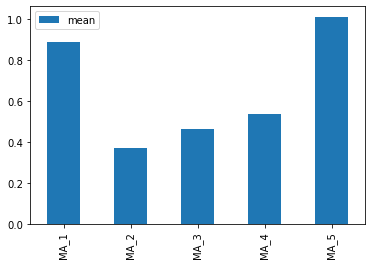

In [40]:
df_1.plot(kind = 'bar')

According to this barplot, most of student feel worry about their poor math grade(MA_5)

In [41]:
# Attributions to Failure

AF_1_mean = clean_df['AF_1'].mean()
AF_2_mean = clean_df['AF_2'].mean()
AF_3_mean = clean_df['AF_3'].mean()
AF_4_mean = clean_df['AF_4'].mean()
AF_5_mean = clean_df['AF_5'].mean()
AF_6_mean = clean_df['AF_6'].mean()

In [42]:
data_2 = {'Attribution' : ['type1','type2','type3','type4','type5','type6'], 'mean' : [AF_1_mean, AF_2_mean, AF_3_mean, AF_4_mean, AF_5_mean, AF_6_mean]}

In [43]:
df_2 = pd.DataFrame(data_2, columns = ['mean'], index = ['AF_1','AF_2','AF_3','AF_4','AF_5','AF_6'])

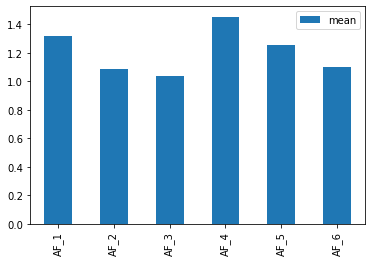

In [44]:
df_2.plot(kind = 'bar')

Most student think the math material is hard and they think they don't good at math

In [45]:
# distribution of math score

clean_df['Score'].mean()

524.4825157697304

(array([4.000e+00, 5.800e+01, 4.260e+02, 1.597e+03, 3.558e+03, 4.245e+03,
        2.848e+03, 9.920e+02, 1.250e+02, 9.000e+00]),
 array([113.1095 , 190.93315, 268.7568 , 346.58045, 424.4041 , 502.22775,
        580.0514 , 657.87505, 735.6987 , 813.52235, 891.346  ]),
 <a list of 10 Patch objects>)

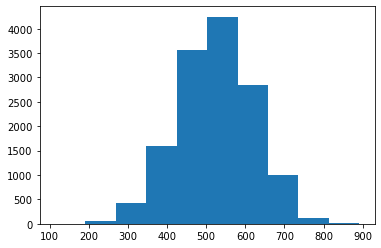

In [46]:
plt.hist(clean_df['Score'])

The math score seem to be normally distributed

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!